# Importing all the libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import sklearn

## For Feature Selection
from sklearn.feature_selection import RFE

## For Splitting data into Test and Train sets
from sklearn.model_selection import train_test_split

## For Classfication Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier

## For Accuracy
import statsmodels
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', -1)

In [5]:
## Please update the file name as per chosen dataset.
all_Features = pd.read_csv('/home/rohit/SRH/CaseStudy1/dataDemo/dataFiles/All_Features_No_Norm_11kURLs.csv', sep=',', index_col=0)

In [6]:
all_Features.shape

(10949, 186)

In [7]:
all_Features.head()

,domain,url,urlType,L_WC,L_Analytic,L_Clout,L_Authentic,L_Tone,L_WPS,L_Sixltr,L_Dic,L_function,L_pronoun,L_ppron,L_i,L_we,L_you,L_shehe,L_they,L_ipron,L_article,L_prep,L_auxverb,L_adverb,L_conj,L_negate,L_verb,L_adj,L_compare,L_interrog,L_number,L_quant,L_affect,L_posemo,L_negemo,L_anx,L_anger,L_sad,L_social,L_family,L_friend,L_female,L_male,L_cogproc,L_insight,L_cause,L_discrep,L_tentat,L_certain,L_differ,L_percept,L_see,L_hear,L_feel,L_bio,L_body,L_health,L_sexual,L_ingest,L_drives,L_affiliation,L_achieve,L_power,L_reward,L_risk,L_focuspast,L_focuspresent,L_focusfuture,L_relativ,L_motion,L_space,L_time,L_work,L_leisure,L_home,L_money,L_relig,L_death,L_informal,L_swear,L_netspeak,L_assent,L_nonflu,L_filler,L_AllPunc,L_Period,L_Comma,L_Colon,L_SemiC,L_QMark,L_Exclam,L_Dash,L_Quote,L_Apostro,L_Parenth,L_OtherP,R_full_text_Flesch_reading_ease,R_full_text_Flesch_kincaid_grade,R_full_text_smog,R_full_text_gunning_fog,R_full_text_words_per_sentence,R_full_text_capitalized_words,R_full_text_lexicon,R_full_text_urls_counts,R_full_text_long_words,R_full_text_syllables,R_full_text_stop_words,R_full_text_sentences,R_full_text_linsear_write,R_full_text_automated_readability,R_full_text_characters_total,R_full_text_coleman_liax,R_full_text_difficult_words,R_full_text_words_total,T_totalTweets,T_totalRetweets,T_totalLikes,T_totalReplies,T_span,T_countWeekDay,T_countWeekEnd,T_countMonday,T_countTuesday,T_countWednesday,T_countThursday,T_countFriday,T_countSaturday,T_countSunday,T_avgTimeBetweenTweets,T_avgTimeOfNextTweet,T_timeAbsBin1count0to6,T_timeAbsBin2count6to12,T_timeAbsBin3count12to18,T_timeAbsBin4count18to24,T_timeAbsBin5count24plus,T_avgTweetsPerUniqUser,M_dollar,M_dblApostrophe,M_comma,M_-LRB-,M_-RRB-,M_dot,M_colon,M_ADD,M_AFX,M_CC,M_CD,M_DT,M_EX,M_FW,M_HYPH,M_IN,M_JJ,M_JJR,M_JJS,M_LS,M_MD,M_NFP,M_NN,M_NNP,M_NNPS,M_NNS,M_PDT,M_POS,M_PRP,M_PRP$,M_RB,M_RBR,M_RBS,M_RP,M_SYM,M_TO,M_UH,M_VB,M_VBD,M_VBG,M_VBN,M_VBP,M_VBZ,M_WDT,M_WP,M_WP$,M_WRB,M_XX,M__SP,M_dblSpecialApostrophe
0,nutritionfacts.org,https://nutritionfacts.org/audio/fighting-fatigue/,Reliable,1241,73.48,52.26,23.58,1.68,8.99,43.27,70.91,12.33,2.01,1.13,0.32,0.24,0.32,0.0,0.24,0.89,0.0,1.85,3.38,4.35,1.13,3.14,13.46,5.24,1.93,0.32,2.34,2.01,8.94,2.90,5.88,0.73,0.81,1.53,6.37,0.16,0.08,0.08,0.16,17.08,4.43,3.95,1.37,3.06,2.34,2.90,6.04,2.01,0.24,2.26,15.55,1.77,10.56,0.24,3.95,7.90,1.53,1.53,2.01,2.01,1.53,1.85,8.46,1.29,10.39,2.82,3.06,4.59,3.87,1.69,0.40,0.40,0.00,0.16,0.73,0.00,0.00,0.56,0.08,0.00,32.23,12.41,13.94,0.32,0.56,0.73,0.00,2.58,0.0,0,0.00,1.69,59.13,18.9,17.6,16.438876,12.162963,110,1202,0,903,2551,10.901340,135,11.142857,23.4,9648,20.77,393,1642,2,26,70,0,5651.250000,1,1,0,0,1,0,0,0,1,5651.250000,5651.250000,1,0,0,0,1,1.0,-1,-1,174,7,7,128,18,-1,-1,3,22,14,4,-1,24,26,187,2,2,1,15,1,396,81,4,148,-1,-1,14,-1,98,1,-1,1,4,1,10,69,29,38,36,38,36,-1,1,1,1,-1,-1,-1
1,nutritionfacts.org,https://nutritionfacts.org/audio/new-thoughts-on-a-healthy-weight/,Reliable,1262,79.00,53.80,15.76,87.14,10.34,36.29,72.90,10.30,1.74,0.79,0.24,0.16,0.32,0.0,0.08,0.95,0.0,1.51,3.09,3.33,0.48,2.54,12.60,7.21,3.49,0.24,3.09,4.75,7.05,5.31,1.74,0.79,0.00,0.79,5.55,0.08,0.00,0.32,0.24,14.74,3.49,4.36,0.79,2.61,2.22,2.30,4.36,0.63,0.40,2.93,21.47,2.46,4.28,0.00,16.80,10.46,1.51,3.41,3.72,3.41,1.19,2.14,6.42,1.35,9.75,1.74,3.72,4.28,3.72,0.63,0.00,0.40,0.00,0.00,0.48,0.00,0.08,0.32,0.08,0.00,29.08,9.59,12.76,0.24,0.24,1.11,0.08,2.22,0.0,0,0.00,2.85,65.38,16.5,15.2,15.443264,14.342105,75,1233,0,872,2403,10.948012,114,8.714286,20.9,9323,18.28,315,1635,1,26,61,1,-1.000000,1,0,0,0,0,0,1,0,0,-1.000000,-1.000000,1,0,0,0,0,1.0,-1,-1,162,17,17,119,8,-1,-1,2,33,9,3,3,26,19,141,30,5,1,23,1,423,46,5,180,-1,-1,11,-1,74,3,-1,1,-1,-1,12,72,42,60,24,40,20,1,-1,1,1,-1,-1,-1
2,nutritionfacts.org,https://nutritionfacts.org/audio/the-latest-on-childrens-health/,Reliable,1306,75.75,56.09,26.05,39.46,11.36,38.82,73.43,11.56,1.07,0.46,0.23,0.00,0.23,0.0,0.00,0.61,0.0,1.68,3.45,4.44,1.38,2.53,11.03,7.27,4.29,0.3

In [8]:
all_Features.tail()

,domain,url,urlType,L_WC,L_Analytic,L_Clout,L_Authentic,L_Tone,L_WPS,L_Sixltr,L_Dic,L_function,L_pronoun,L_ppron,L_i,L_we,L_you,L_shehe,L_they,L_ipron,L_article,L_prep,L_auxverb,L_adverb,L_conj,L_negate,L_verb,L_adj,L_compare,L_interrog,L_number,L_quant,L_affect,L_posemo,L_negemo,L_anx,L_anger,L_sad,L_social,L_family,L_friend,L_female,L_male,L_cogproc,L_insight,L_cause,L_discrep,L_tentat,L_certain,L_differ,L_percept,L_see,L_hear,L_feel,L_bio,L_body,L_health,L_sexual,L_ingest,L_drives,L_affiliation,L_achieve,L_power,L_reward,L_risk,L_focuspast,L_focuspresent,L_focusfuture,L_relativ,L_motion,L_space,L_time,L_work,L_leisure,L_home,L_money,L_relig,L_death,L_informal,L_swear,L_netspeak,L_assent,L_nonflu,L_filler,L_AllPunc,L_Period,L_Comma,L_Colon,L_SemiC,L_QMark,L_Exclam,L_Dash,L_Quote,L_Apostro,L_Parenth,L_OtherP,R_full_text_Flesch_reading_ease,R_full_text_Flesch_kincaid_grade,R_full_text_smog,R_full_text_gunning_fog,R_full_text_words_per_sentence,R_full_text_capitalized_words,R_full_text_lexicon,R_full_text_urls_counts,R_full_text_long_words,R_full_text_syllables,R_full_text_stop_words,R_full_text_sentences,R_full_text_linsear_write,R_full_text_automated_readability,R_full_text_characters_total,R_full_text_coleman_liax,R_full_text_difficult_words,R_full_text_words_total,T_totalTweets,T_totalRetweets,T_totalLikes,T_totalReplies,T_span,T_countWeekDay,T_countWeekEnd,T_countMonday,T_countTuesday,T_countWednesday,T_countThursday,T_countFriday,T_countSaturday,T_countSunday,T_avgTimeBetweenTweets,T_avgTimeOfNextTweet,T_timeAbsBin1count0to6,T_timeAbsBin2count6to12,T_timeAbsBin3count12to18,T_timeAbsBin4count18to24,T_timeAbsBin5count24plus,T_avgTweetsPerUniqUser,M_dollar,M_dblApostrophe,M_comma,M_-LRB-,M_-RRB-,M_dot,M_colon,M_ADD,M_AFX,M_CC,M_CD,M_DT,M_EX,M_FW,M_HYPH,M_IN,M_JJ,M_JJR,M_JJS,M_LS,M_MD,M_NFP,M_NN,M_NNP,M_NNPS,M_NNS,M_PDT,M_POS,M_PRP,M_PRP$,M_RB,M_RBR,M_RBS,M_RP,M_SYM,M_TO,M_UH,M_VB,M_VBD,M_VBG,M_VBN,M_VBP,M_VBZ,M_WDT,M_WP,M_WP$,M_WRB,M_XX,M__SP,M_dblSpecialApostrophe
10944,thetruthdivision.com,http://thetruthdivision.com/2016/12/shock-trump-supporter-scott-baio-attacked-for-political-beliefs-files-police-report/,Fake,157,90.55,79.61,5.62,37.02,10.47,40.76,57.96,5.73,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.64,1.27,3.18,0.64,0.00,0.64,12.74,8.28,1.91,0.0,1.27,0.00,12.10,6.37,5.73,0.00,3.82,0.64,9.55,0.64,0.00,1.91,0.0,8.28,2.55,1.27,2.55,1.91,1.27,0.64,5.10,1.91,1.91,1.27,2.55,0.64,1.27,0.64,0.64,15.92,3.82,2.55,8.28,0.64,1.27,3.18,7.01,0.64,10.83,2.55,0.64,7.64,6.37,3.82,0.00,0.00,0.64,0.00,1.27,0.0,1.27,0.00,0.0,0.0,28.03,11.46,7.01,0.64,0.00,0.0,0.00,7.01,0.0,0,0.00,1.91,60.88,13.5,12.2,20.067216,10.437500,51,140,1,109,274,107.185629,16,6.875000,19.4,1158,21.92,58,167,7,13,13,1,16.766667,7,0,0,0,0,5,2,0,0,2.794444,3.580556,6,0,1,0,0,1.166667,-1,-1,11,-1,-1,14,1,1,-1,-1,-1,-1,-1,-1,-1,-1,15,1,-1,-1,3,-1,23,47,1,16,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,4,8,8,3,3,4,-1,-1,-1,-1,-1,-1,-1
10945,thetruthdivision.com,http://thetruthdivision.com/2017/02/breaking-teacher-fired-shocking-statement-trump-supporters/,Fake,124,91.63,90.14,34.13,83.22,12.40,53.23,63.71,6.45,0.81,0.00,0.0,0.00,0.00,0.0,0.0,0.81,0.81,1.61,0.81,1.61,0.00,0.81,11.29,2.42,1.61,0.0,1.61,0.81,11.29,7.26,4.03,1.61,1.61,0.00,14.52,0.00,0.00,0.00,0.0,8.06,2.42,2.42,0.81,1.61,0.81,0.81,4.03,0.00,4.03,0.00,0.00,0.00,0.00,0.00,0.00,16.13,4.84,2.42,6.45,2.42,1.61,4.84,6.45,0.00,16.13,4.03,6.45,4.84,12.90,4.03,0.00,0.81,0.00,1.61,3.23,0.0,1.61,1.61,0.0,0.0,31.45,10.48,4.84,3.23,0.00,0.0,0.81,9.68,0.0,0,0.00,2.42,44.64,15.6,14.0,19.450999,9.769231,30,106,1,83,233,140.944882,13,10.428571,23.8,986,27.13,43,127,5,12,11,2,6.716667,5,0,5,0,0,0,0,0,0,1.679167,3.108333,4,1,0,0,0,1.000000,-1,-1,6,-1,-1,9,4,1,-1,-1,2,-1,-1,-1,1,-1,9,-1,-1,-1,-1,-1,33,26,-1,7,-1,-1,-1,-1,3,1,-1,-1,-1,-1,-1,2,11,7,1,2,2,-1,-1,-1,-1,-1,-1,-1
10946,thetruthdivision.com,http://thetruthdivision.com/2016/11/obama-tells-trump-presidency-cant-treated-casually-golfs-324-times/,Fake,145,80.39,55.48,13.87,37.99,16.11,

In [9]:
all_Features['urlType'].unique()

array(['Reliable', 'Fake'], dtype=object)

In [10]:
list(all_Features.columns)

['domain',
 'url',
 'urlType',
 'L_WC',
 'L_Analytic',
 'L_Clout',
 'L_Authentic',
 'L_Tone',
 'L_WPS',
 'L_Sixltr',
 'L_Dic',
 'L_function',
 'L_pronoun',
 'L_ppron',
 'L_i',
 'L_we',
 'L_you',
 'L_shehe',
 'L_they',
 'L_ipron',
 'L_article',
 'L_prep',
 'L_auxverb',
 'L_adverb',
 'L_conj',
 'L_negate',
 'L_verb',
 'L_adj',
 'L_compare',
 'L_interrog',
 'L_number',
 'L_quant',
 'L_affect',
 'L_posemo',
 'L_negemo',
 'L_anx',
 'L_anger',
 'L_sad',
 'L_social',
 'L_family',
 'L_friend',
 'L_female',
 'L_male',
 'L_cogproc',
 'L_insight',
 'L_cause',
 'L_discrep',
 'L_tentat',
 'L_certain',
 'L_differ',
 'L_percept',
 'L_see',
 'L_hear',
 'L_feel',
 'L_bio',
 'L_body',
 'L_health',
 'L_sexual',
 'L_ingest',
 'L_drives',
 'L_affiliation',
 'L_achieve',
 'L_power',
 'L_reward',
 'L_risk',
 'L_focuspast',
 'L_focuspresent',
 'L_focusfuture',
 'L_relativ',
 'L_motion',
 'L_space',
 'L_time',
 'L_work',
 'L_leisure',
 'L_home',
 'L_money',
 'L_relig',
 'L_death',
 'L_informal',
 'L_swear',
 '

# Implementing Feature Selection

In [11]:
#Slicing of data to devide it into target and feature set
X=all_Features.drop(columns=['url','domain','urlType'])
y=all_Features['urlType'].to_frame()

In [12]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=196)
model_tree.fit(X, y)
print(model_tree.feature_importances_)
sel_model_tree = sklearn.feature_selection.SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_sfm_tree = sel_model_tree.transform(X)
print(sel_model_tree.get_support())

/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[6.21980990e-03 1.66539572e-02 3.94686052e-03 3.30523410e-03
 6.04638081e-03 5.38141033e-03 4.82540118e-03 5.22404165e-03
 8.46531038e-03 1.57032697e-02 1.09416744e-02 1.29277045e-03
 3.64959982e-03 1.53675959e-03 1.20452311e-03 9.05418702e-04
 4.81497964e-03 1.01039165e-03 3.07034493e-03 1.42977393e-02
 5.04672631e-03 2.38739522e-03 4.00221554e-03 6.42037394e-03
 3.97218473e-03 4.26566365e-03 1.45472250e-03 1.40186072e-02
 2.78312399e-03 4.09080303e-03 4.70715300e-03 7.20879072e-03
 2.28305000e-03 1.15729105e-02 2.06813465e-03 5.33627989e-03
 1.96447047e-03 2.08122469e-03 1.71282401e-03 2.12730989e-03
 9.37355342e-03 9.43063024e-03 3.53813439e-03 2.85931794e-03
 3.46548336e-03 1.40936810e-02 2.87102528e-03 6.11950004e-03
 5.04001001e-03 5.81768399e-03 3.01723554e-03 5.19026357e-03
 2.50964282e-03 2.96886683e-03 1.85127111e-03 3.99505669e-03
 3.89109945e-03 3.56745177e-03 4.88097925e-03 6.84350416e-03
 3.63859880e-03 3.42525909e-03 4.63135416e-03 1.16603699e-02
 2.93732989e-03 4.133670

In [13]:
data = list(all_Features.columns)

In [14]:
FeatureSelection = pd.DataFrame(data) 

In [15]:
FeatureSelection.head()

,0
0,domain
1,url
2,urlType
3,L_WC
4,L_Analytic


In [16]:
FeatureSelection.shape

(186, 1)

In [17]:
FeatureSelection.tail()

,0
181,M_WP$
182,M_WRB
183,M_XX
184,M__SP
185,M_dblSpecialApostrophe


In [18]:
FeatureSelection = FeatureSelection.drop([0,1,2])
FeatureSelection = FeatureSelection.reset_index(drop=True)

In [19]:
FeatureSelection.columns = ['Column-Name']

In [20]:
FeatureSelection['Value'] = sel_model_tree.get_support()

In [21]:
FeatureSelection.head()

,Column-Name,Value
0,L_WC,True
1,L_Analytic,True
2,L_Clout,False
3,L_Authentic,False
4,L_Tone,True


In [22]:
FinalFeaturesToSelect = FeatureSelection.loc[FeatureSelection['Value'] == True]['Column-Name']

In [23]:
list(FinalFeaturesToSelect)

['L_WC',
 'L_Analytic',
 'L_Tone',
 'L_function',
 'L_pronoun',
 'L_ppron',
 'L_auxverb',
 'L_verb',
 'L_number',
 'L_negemo',
 'L_anger',
 'L_cogproc',
 'L_insight',
 'L_certain',
 'L_percept',
 'L_hear',
 'L_power',
 'L_focuspresent',
 'L_time',
 'L_leisure',
 'L_informal',
 'L_netspeak',
 'L_AllPunc',
 'L_Comma',
 'L_QMark',
 'L_Exclam',
 'L_Dash',
 'L_Quote',
 'L_OtherP',
 'R_full_text_Flesch_reading_ease',
 'R_full_text_gunning_fog',
 'R_full_text_words_per_sentence',
 'R_full_text_lexicon',
 'R_full_text_urls_counts',
 'R_full_text_syllables',
 'R_full_text_stop_words',
 'R_full_text_linsear_write',
 'R_full_text_coleman_liax',
 'R_full_text_words_total',
 'T_totalLikes',
 'T_timeAbsBin1count0to6',
 'T_avgTweetsPerUniqUser',
 'M_dblApostrophe',
 'M_comma',
 'M_dot',
 'M_ADD',
 'M_AFX',
 'M_CD',
 'M_NN',
 'M_NNP',
 'M_dblSpecialApostrophe']

In [24]:
X = all_Features[list(FinalFeaturesToSelect)].values

In [25]:
X.shape

(10949, 51)

# Decision Tree with criterion gini index [DT(G)] Classification

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [27]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [28]:
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

[Text(351.702545344481, 360.79999999999995, 'X[25] <= 0.055\ngini = 0.5\nsamples = 8759\nvalue = [4386, 4373]'),
 Text(257.7333527503655, 343.2, 'X[47] <= 7.5\ngini = 0.43\nsamples = 5547\nvalue = [1735, 3812]'),
 Text(172.87088815789474, 325.59999999999997, 'X[27] <= 0.685\ngini = 0.5\nsamples = 2606\nvalue = [1269, 1337]'),
 Text(134.72423245614036, 308.0, 'X[4] <= 1.775\ngini = 0.491\nsamples = 2203\nvalue = [1251, 952]'),
 Text(95.97139985380116, 290.4, 'X[41] <= 1.408\ngini = 0.493\nsamples = 1370\nvalue = [606, 764]'),
 Text(62.504203216374265, 272.79999999999995, 'X[13] <= 0.335\ngini = 0.473\nsamples = 1185\nvalue = [456, 729]'),
 Text(30.750730994152047, 255.2, 'X[40] <= 2.5\ngini = 0.366\nsamples = 477\nvalue = [115, 362]'),
 Text(18.445906432748536, 237.6, 'X[47] <= 1.5\ngini = 0.445\nsamples = 254\nvalue = [85, 169]'),
 Text(10.333333333333332, 219.99999999999997, 'X[31] <= 12.55\ngini = 0.49\nsamples = 86\nvalue = [49, 37]'),
 Text(6.888888888888888, 202.39999999999998, 'X

In [29]:
y_pred_gi = clf_gini.predict(X_test)
y_pred_gi

array(['Reliable', 'Fake', 'Fake', ..., 'Fake', 'Fake', 'Reliable'],
      dtype=object)

In [30]:
print(confusion_matrix(y_test, y_pred_gi))

[[929 179]
 [162 920]]


In [31]:
print("Accuracy is {}".format(accuracy_score(y_test,y_pred_gi)*100))

Accuracy is 84.42922374429223


In [32]:
del X_train, X_test, y_train, y_test

# Decision Tree with criterion entropy index [DT(E)] Classification

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [34]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

[Text(242.44555610405223, 212.91, 'X[25] <= 0.055\nentropy = 1.0\nsamples = 8759\nvalue = [4386, 4373]'),
 Text(184.2613731971154, 203.85, 'X[27] <= 0.685\nentropy = 0.896\nsamples = 5547\nvalue = [1735, 3812]'),
 Text(149.7513178228022, 194.79, 'X[47] <= 10.5\nentropy = 0.969\nsamples = 4272\nvalue = [1692, 2580]'),
 Text(99.66334993131869, 185.73, 'X[4] <= 1.855\nentropy = 0.998\nsamples = 2731\nvalue = [1442, 1289]'),
 Text(73.48075206043957, 176.67, 'X[41] <= 1.348\nentropy = 0.977\nsamples = 1773\nvalue = [728, 1045]'),
 Text(53.620844780219784, 167.60999999999999, 'X[26] <= 1.425\nentropy = 0.935\nsamples = 1528\nvalue = [537, 991]'),
 Text(29.99505494505495, 158.55, 'X[13] <= 2.155\nentropy = 0.997\nsamples = 699\nvalue = [326, 373]'),
 Text(21.563736263736267, 149.49, 'X[39] <= 0.5\nentropy = 0.978\nsamples = 592\nvalue = [245, 347]'),
 Text(15.465934065934068, 140.43, 'X[40] <= 3.5\nentropy = 0.997\nsamples = 310\nvalue = [165, 145]'),
 Text(12.127472527472529, 131.37, 'X[44] 

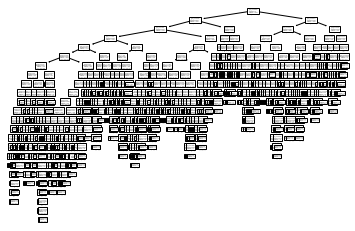

In [35]:
tree.plot_tree(clf_entropy.fit(X_train, y_train)) 

In [36]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['Reliable', 'Fake', 'Fake', ..., 'Fake', 'Reliable', 'Reliable'],
      dtype=object)

In [37]:
print(confusion_matrix(y_test, y_pred_en))

[[932 176]
 [156 926]]


In [38]:
print("Accuracy is {}".format(accuracy_score(y_test,y_pred_en)*100))

Accuracy is 84.84018264840184


In [39]:
del X_train, X_test, y_train, y_test

# K-Nearest Neighbors (KNN) Classification

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [41]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [42]:
classifier.fit(X_train, y_train)

/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred_knn = classifier.predict(X_test)

In [44]:
print(confusion_matrix(y_test, y_pred_knn))

[[847 261]
 [312 770]]


In [45]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_knn)*100))

Accuracy is 73.83561643835617


In [46]:
del X_train, X_test, y_train, y_test

# Random Forest (RF) Classification

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [48]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=100)
model_tree.fit(X_train, y_train)

/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [49]:
y_pred_rf = model_tree.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred_rf))

[[1021   87]
 [ 105  977]]


In [51]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_rf)*100))

Accuracy is 91.23287671232877


In [52]:
del X_train, X_test, y_train, y_test

# Support Vector Machine (SVM) Classification 

In [77]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [78]:
clf = svm.SVC(kernel='linear')

In [79]:
clf.fit(X_train, y_train)

/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
y_pred_svm = clf.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred_svm))

[[957 151]
 [118 964]]


In [82]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_svm)*100))

Accuracy is 87.71689497716895


In [83]:
del X_train, X_test, y_train, y_test

# Logistic Regression (LR) Classification

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [54]:
logisticRegr = LogisticRegression()

In [55]:
logisticRegr.fit(X_train, y_train)

/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred_lr = logisticRegr.predict(X_test)

In [57]:
print(confusion_matrix(y_test, y_pred_lr))

[[967 141]
 [119 963]]


In [58]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_lr)*100))

Accuracy is 88.12785388127854


In [59]:
del X_train, X_test, y_train, y_test

# XGBoost Classification

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [61]:
model = XGBClassifier(learning_rate = 0.05, n_estimators = 300, max_depth = 5)

In [62]:
model.fit(X_train, y_train)

/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rohit/anaconda3/envs/fakenewsdemo1/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [63]:
y_pred_xg = model.predict(X_test)

In [64]:
print(confusion_matrix(y_test, y_pred_xg))

[[1022   86]
 [  93  989]]


In [65]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_xg)*100))

Accuracy is 91.82648401826484


In [66]:
del X_train, X_test, y_train, y_test

# End